In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
gdp = pd.read_csv('Datasets/country_gdp_filtered.csv', sep=',')

In [4]:
len(gdp)

217

In [5]:
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.481857e+09,2.929447e+09,3.279344e+09,3.648573e+09,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426000e+10,1.449724e+10,1.715223e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.049642e+10,5.276162e+10,7.369015e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.040000e+11,8.487516e+10,8.039694e+10
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.147017e+10,1.198867e+10,1.325827e+10,1.537951e+10,1.558511e+10,1.524146e+10,1.803201e+10,1.901724e+10,2.354718e+10,2.717774e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.789881e+09,2.896610e+09,3.000162e+09,3.218420e+09,3.155149e+09,2.891001e+09,3.324648e+09,3.380613e+09,3.785067e+09,4.039844e+09


In [6]:
# Define year range
years_1960_2018 = [str(y) for y in range(1960, 2018 + 1)]

# Find any nulls in these columns
countries_with_nulls = gdp[gdp[years_1960_2018].isna().any(axis=1)]

# Extract country names
country_list = countries_with_nulls['Country Name'].tolist()

# Print results
print("Countries with at least ONE null GDP entry from 1960 to 2018:\n")
for c in country_list:
    print("-", c)

print("\nTotal countries:", len(country_list))

Countries with at least ONE null GDP entry from 1960 to 2018:

- Aruba
- Afghanistan
- Angola
- Albania
- Andorra
- United Arab Emirates
- Armenia
- American Samoa
- Antigua and Barbuda
- Azerbaijan
- Bulgaria
- Bahrain
- Bosnia and Herzegovina
- Belarus
- Brunei Darussalam
- Bhutan
- Channel Islands
- Comoros
- Cabo Verde
- Cuba
- Curacao
- Cayman Islands
- Cyprus
- Czechia
- Djibouti
- Dominica
- Eritrea
- Estonia
- Faroe Islands
- Micronesia, Fed. Sts.
- Georgia
- Gibraltar
- Guinea
- Gambia, The
- Guinea-Bissau
- Equatorial Guinea
- Grenada
- Greenland
- Guam
- Croatia
- Hungary
- Indonesia
- Isle of Man
- Jordan
- Kazakhstan
- Kyrgyz Republic
- Cambodia
- Kiribati
- Kuwait
- Lao PDR
- Lebanon
- St. Lucia
- Liechtenstein
- Lithuania
- Latvia
- Macao SAR, China
- St. Martin (French part)
- Monaco
- Moldova
- Maldives
- Marshall Islands
- North Macedonia
- Mali
- Malta
- Montenegro
- Mongolia
- Northern Mariana Islands
- Mozambique
- Mauritania
- Malawi
- Namibia
- New Caledonia
- Na

In [7]:
# Define year range
years_1980_2018 = [str(y) for y in range(1980, 2018 + 1)]

# Find any nulls in these columns
countries_with_nulls = gdp[gdp[years_1980_2018].isna().any(axis=1)]

# Extract country names
country_list = countries_with_nulls['Country Name'].tolist()

# Print results
print("Countries with at least ONE null GDP entry from 1980 to 2018:\n")
for c in country_list:
    print("-", c)

print("\nTotal countries:", len(country_list))

Countries with at least ONE null GDP entry from 1980 to 2018:

- Aruba
- Afghanistan
- Armenia
- American Samoa
- Azerbaijan
- Bosnia and Herzegovina
- Belarus
- Channel Islands
- Curacao
- Cayman Islands
- Czechia
- Djibouti
- Eritrea
- Estonia
- Georgia
- Gibraltar
- Guam
- Croatia
- Isle of Man
- Kazakhstan
- Kyrgyz Republic
- Lao PDR
- Lebanon
- Lithuania
- Latvia
- Macao SAR, China
- St. Martin (French part)
- Moldova
- North Macedonia
- Montenegro
- Northern Mariana Islands
- Mozambique
- Poland
- Korea, Dem. People's Rep.
- West Bank and Gaza
- Romania
- San Marino
- Serbia
- South Sudan
- Slovak Republic
- Slovenia
- Sint Maarten (Dutch part)
- Turks and Caicos Islands
- Tajikistan
- Turkmenistan
- Timor-Leste
- Ukraine
- Uzbekistan
- Venezuela, RB
- British Virgin Islands
- Virgin Islands (U.S.)
- Viet Nam
- Kosovo
- Yemen, Rep.

Total countries: 54


Due to above reason we would be removing countries with null data from before 1980

In [8]:
years = [str(y) for y in range(1980, 2019)]
gdp_1980_2018 = gdp[["Country Name", "Country Code"] + years]

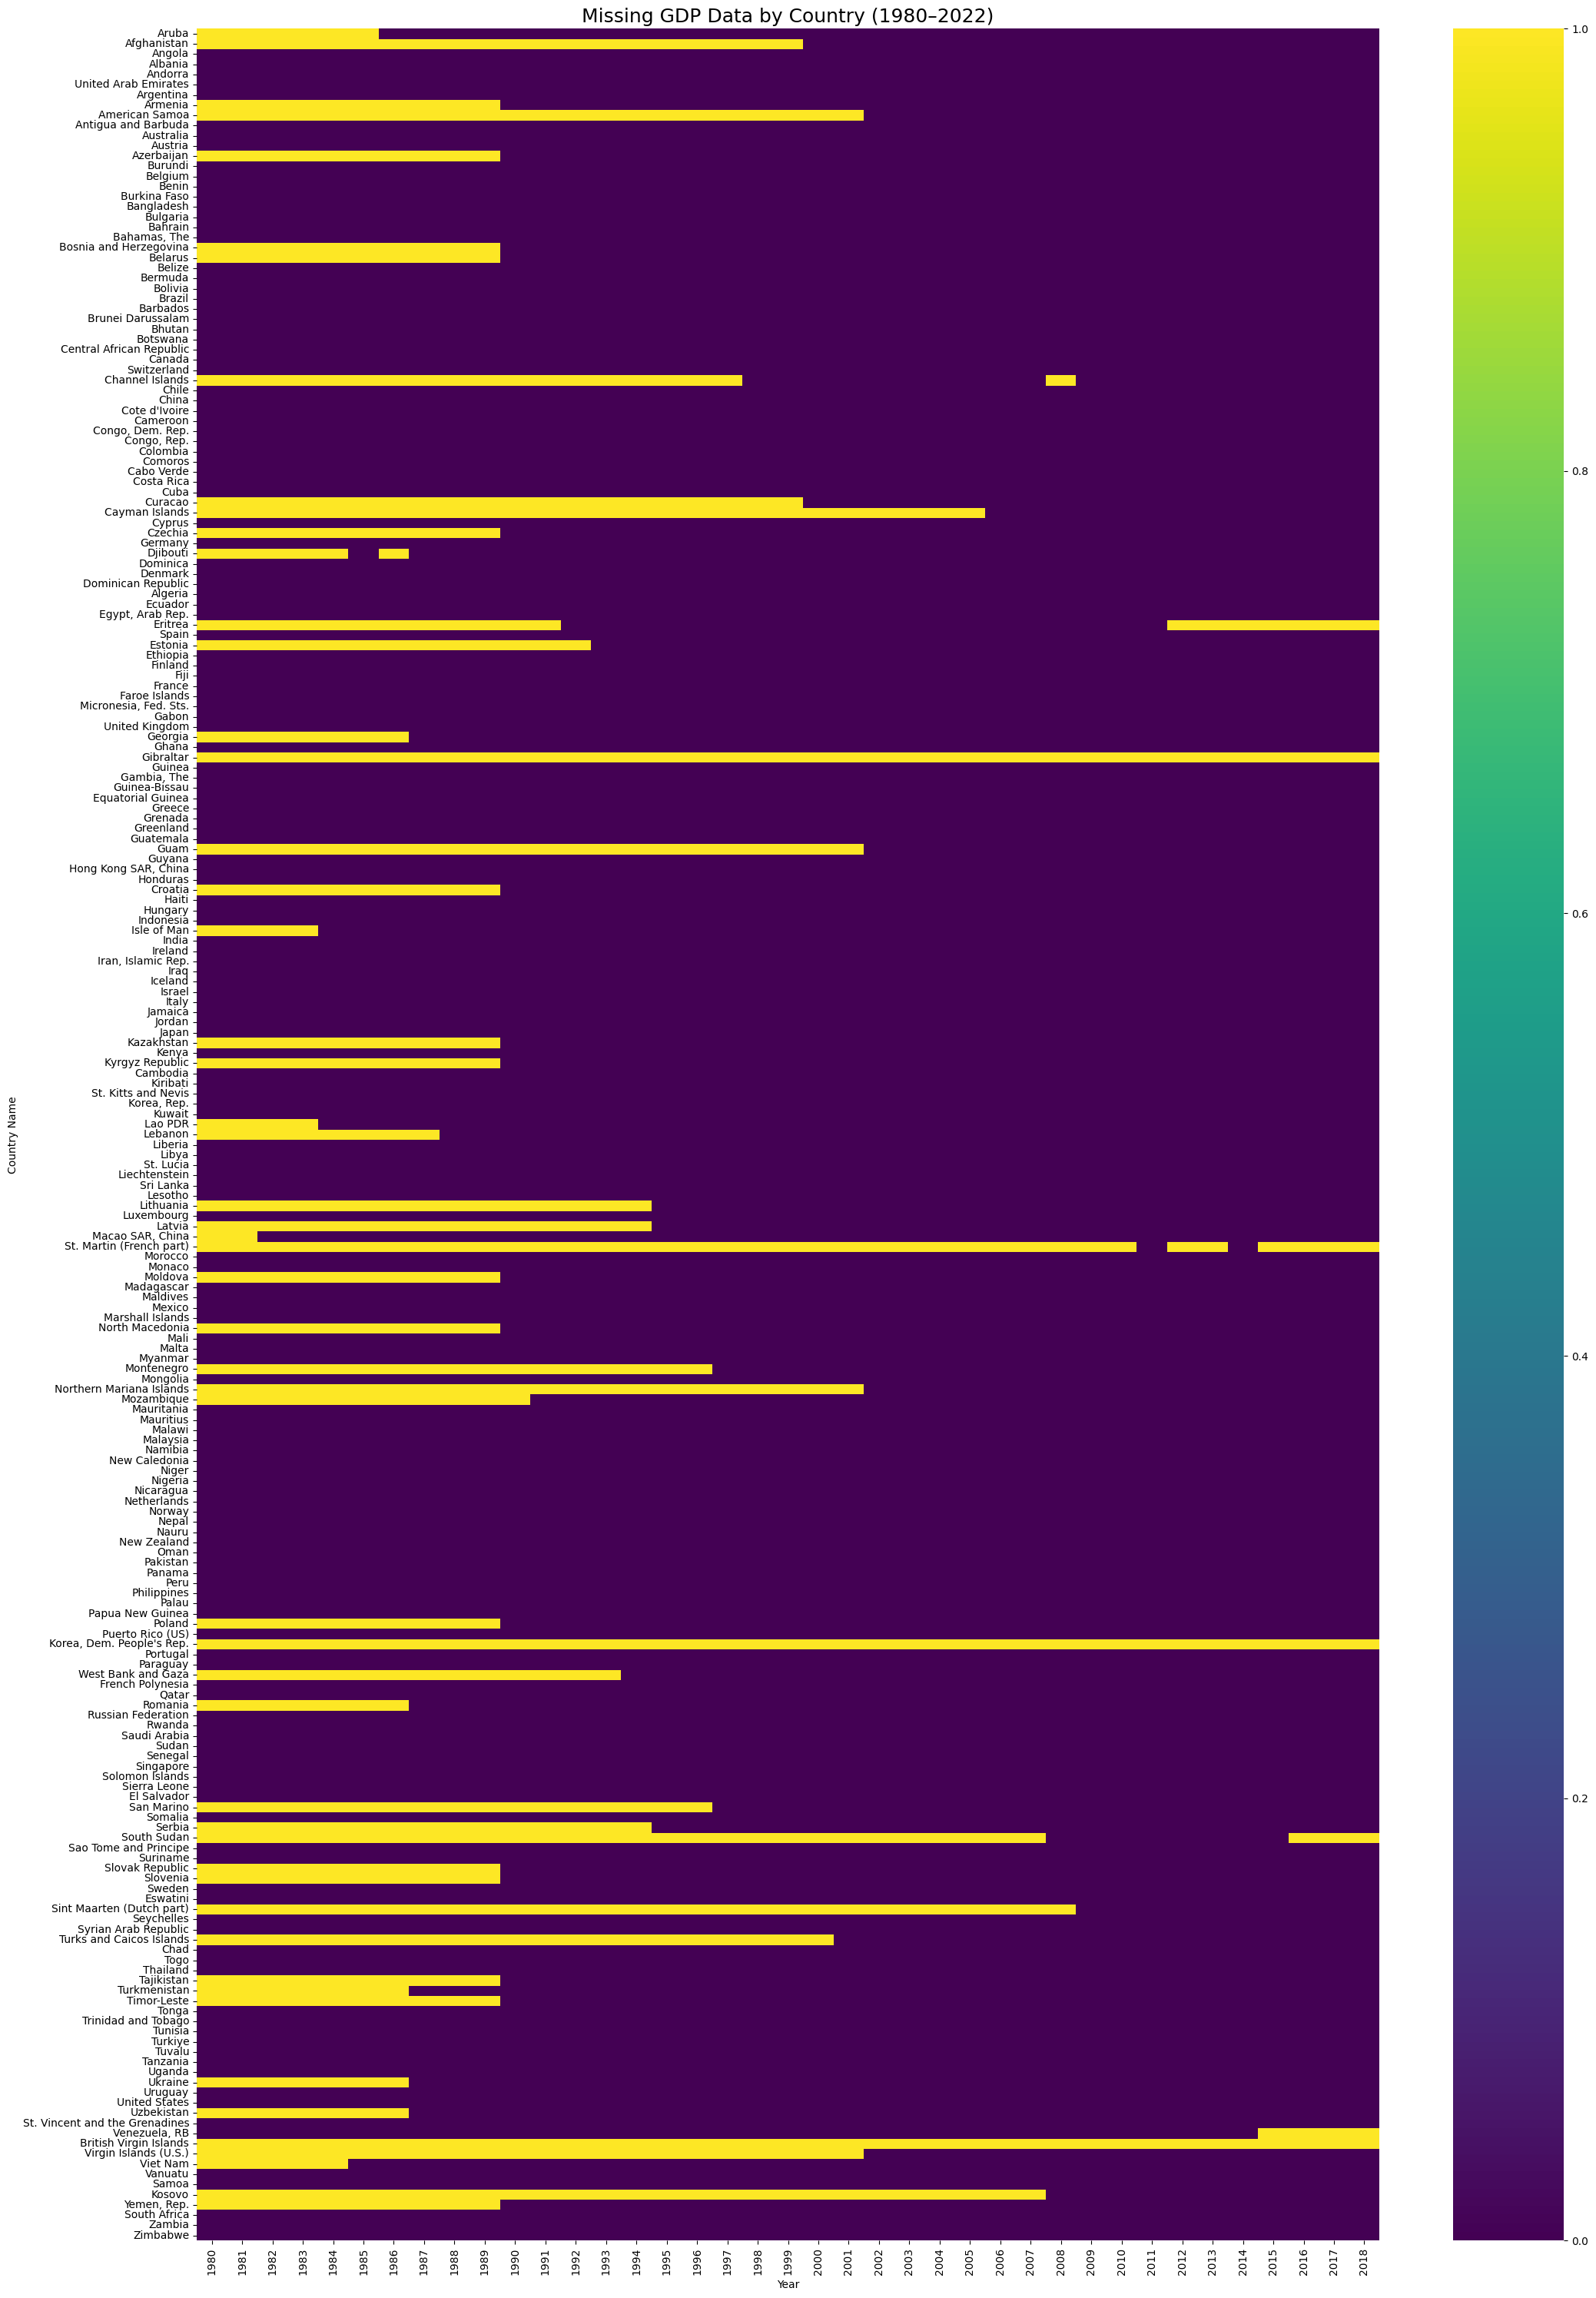

In [9]:
# Create heatmap
plt.figure(figsize=(22, 30))  # taller so names fit

sns.heatmap(
    gdp_1980_2018.set_index("Country Name")[years].isna(),
    cmap="viridis",
    cbar=True,
    yticklabels=True   # ← SHOW COUNTRY NAMES
)

plt.title("Missing GDP Data by Country (1980–2022)", fontsize=18)
plt.xlabel("Year")
plt.ylabel("Country Name")
plt.tight_layout()
plt.show()


In [10]:
years = [str(y) for y in range(1980, 2023)]
gdp_1980_2018 = gdp[["Country Name", "Country Code"] + years]


In [11]:
fully_complete_gdp = gdp_1980_2018.dropna(subset=years, how="any")
removed_countries = gdp_1980_2018[gdp_1980_2018[years].isna().any(axis=1)]["Country Name"].tolist()
kept_countries = fully_complete_gdp["Country Name"].tolist()

print("Countries removed (have ≥1 null):", len(removed_countries))
for c in removed_countries:
    print(" -", c)

print("\nCountries kept (no nulls at all):", len(kept_countries))
for c in kept_countries:
    print(" +", c)


Countries removed (have ≥1 null): 55
 - Aruba
 - Afghanistan
 - Armenia
 - American Samoa
 - Azerbaijan
 - Bosnia and Herzegovina
 - Belarus
 - Channel Islands
 - Cuba
 - Curacao
 - Cayman Islands
 - Czechia
 - Djibouti
 - Eritrea
 - Estonia
 - Georgia
 - Gibraltar
 - Guam
 - Croatia
 - Isle of Man
 - Kazakhstan
 - Kyrgyz Republic
 - Lao PDR
 - Lebanon
 - Lithuania
 - Latvia
 - Macao SAR, China
 - St. Martin (French part)
 - Moldova
 - North Macedonia
 - Montenegro
 - Northern Mariana Islands
 - Mozambique
 - Poland
 - Korea, Dem. People's Rep.
 - West Bank and Gaza
 - Romania
 - San Marino
 - Serbia
 - South Sudan
 - Slovak Republic
 - Slovenia
 - Sint Maarten (Dutch part)
 - Turks and Caicos Islands
 - Tajikistan
 - Turkmenistan
 - Timor-Leste
 - Ukraine
 - Uzbekistan
 - Venezuela, RB
 - British Virgin Islands
 - Virgin Islands (U.S.)
 - Viet Nam
 - Kosovo
 - Yemen, Rep.

Countries kept (no nulls at all): 162
 + Angola
 + Albania
 + Andorra
 + United Arab Emirates
 + Argentina
 + Ant

going forward i have removed all the countries with atleast a single zero

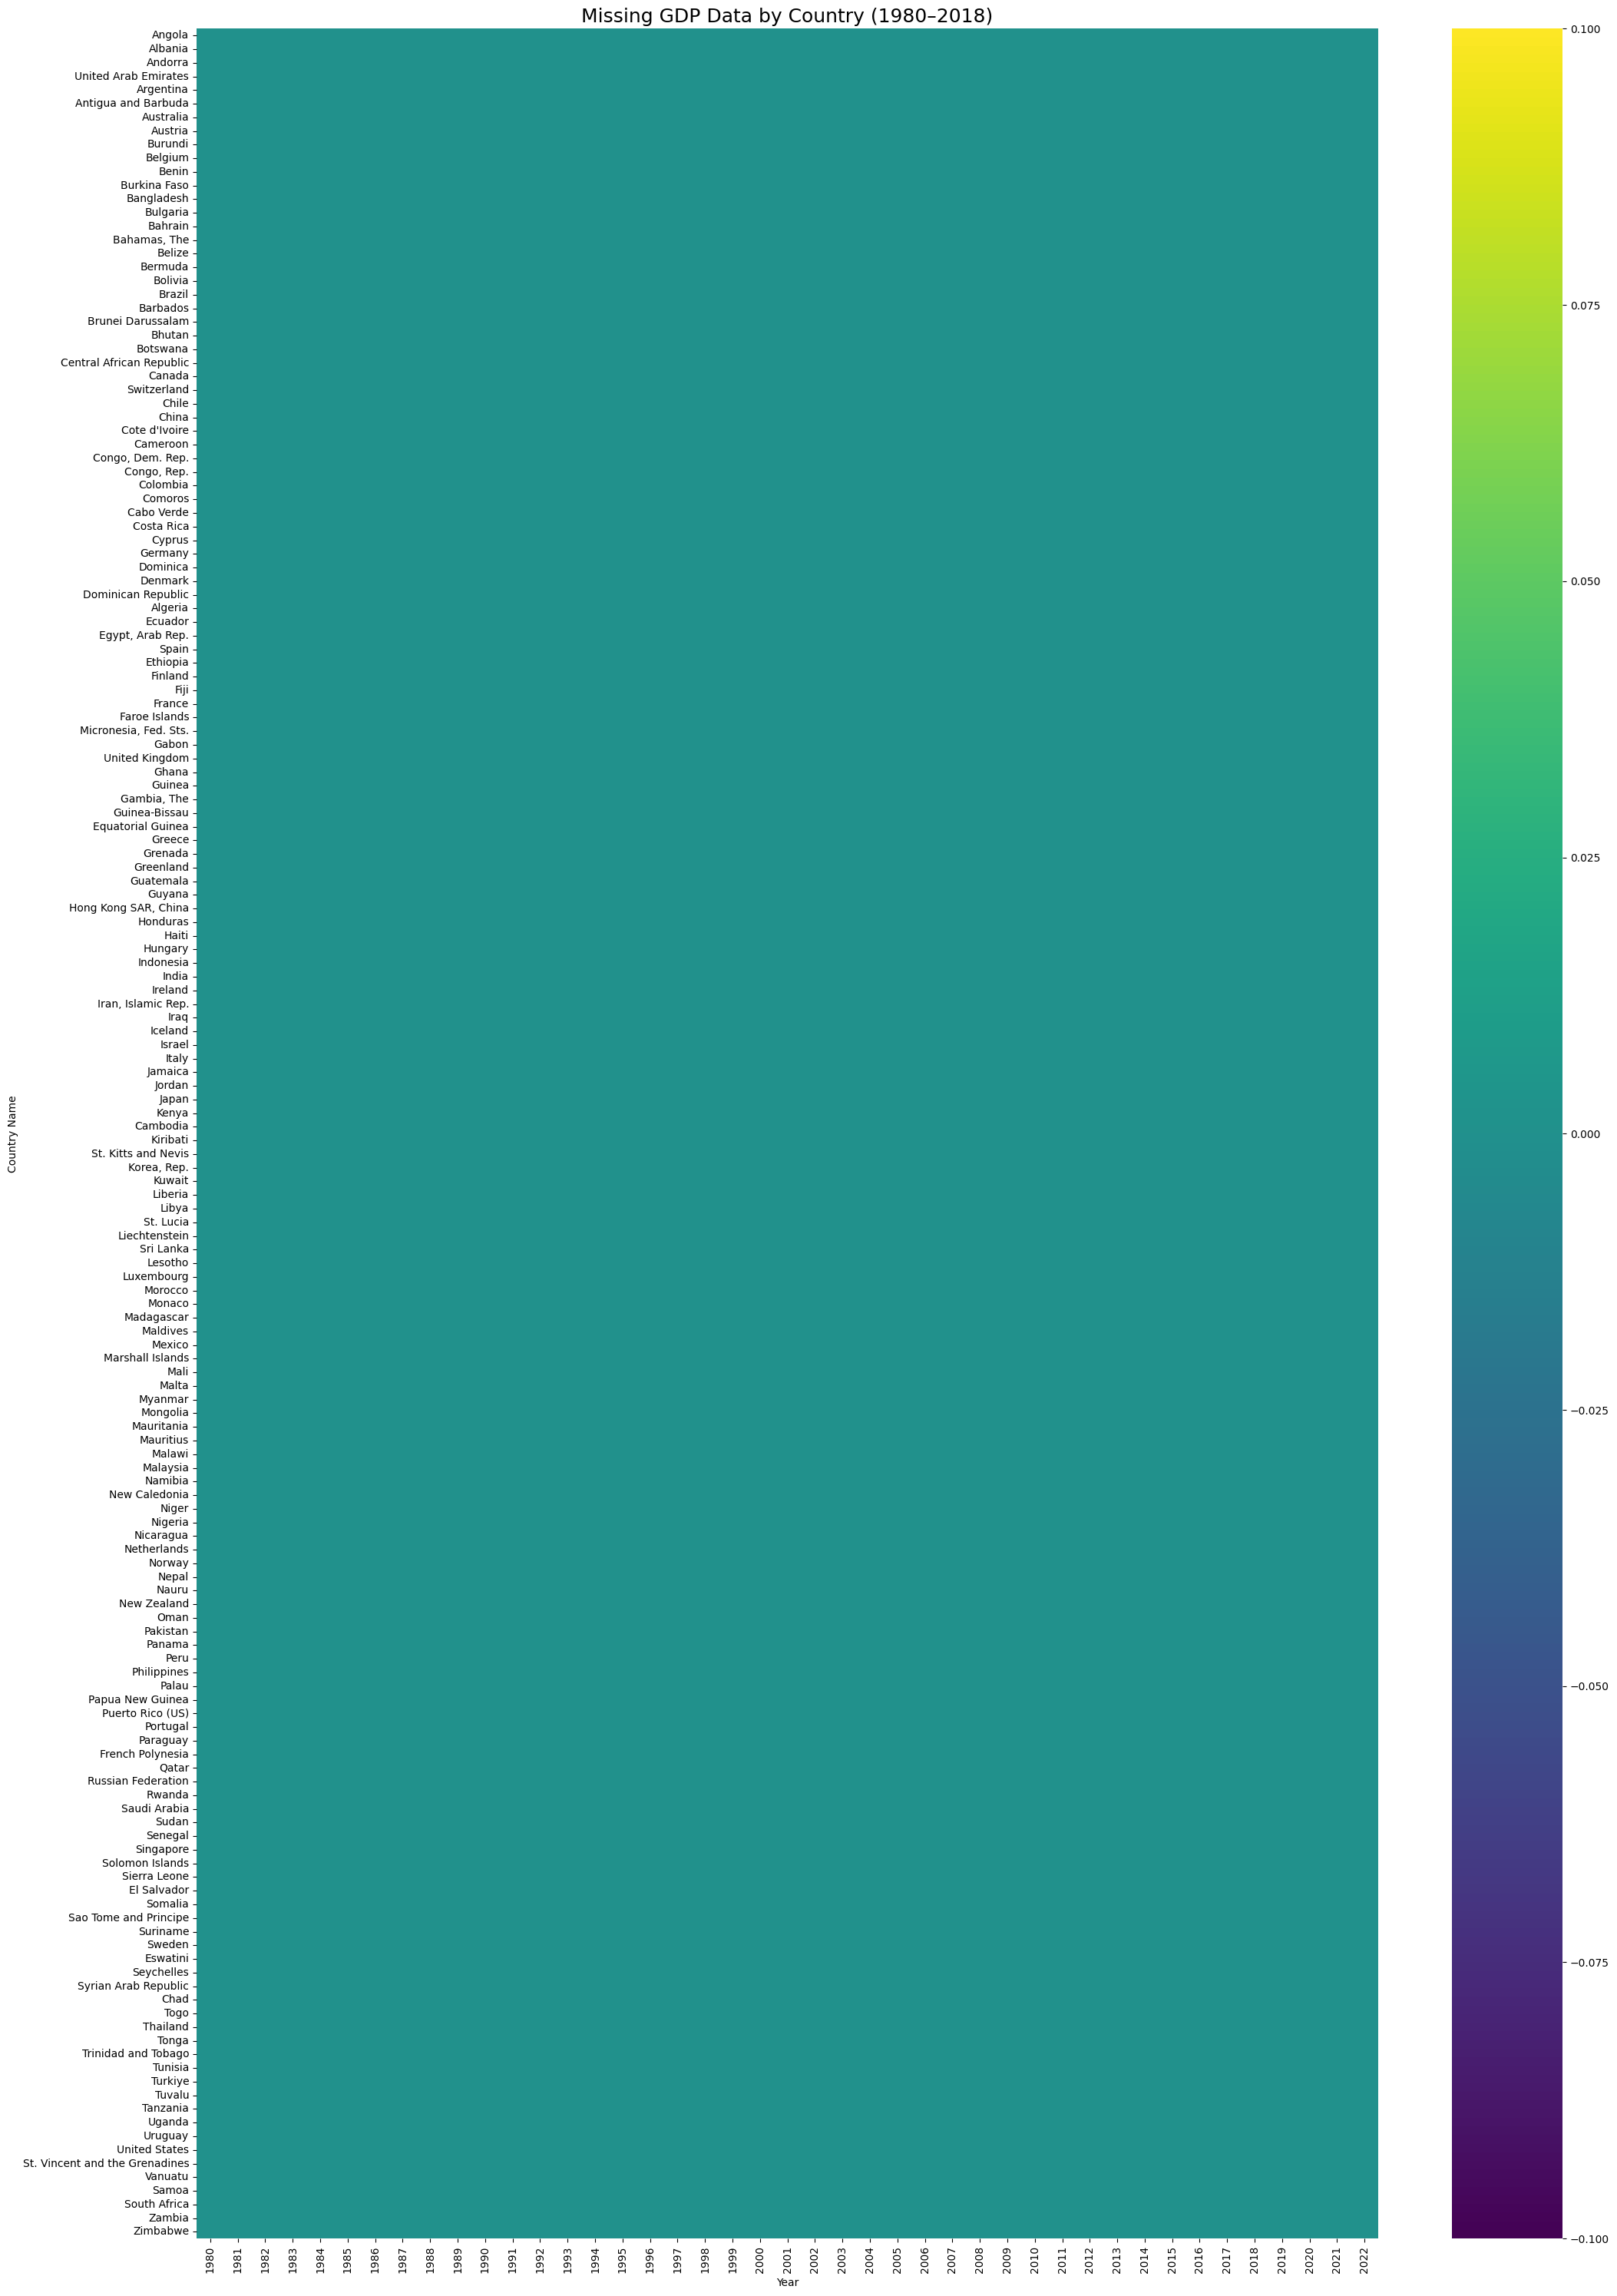

In [12]:
# Create heatmap
plt.figure(figsize=(22, 30))  # taller so names fit

sns.heatmap(
    fully_complete_gdp.set_index("Country Name")[years].isna(),
    cmap="viridis",
    cbar=True,
    yticklabels=True   # ← SHOW COUNTRY NAMES
)

plt.title("Missing GDP Data by Country (1980–2018)", fontsize=18)
plt.xlabel("Year")
plt.ylabel("Country Name")
plt.tight_layout()
plt.show()

In [13]:
fully_complete_gdp.to_csv("cleaned_gdp_1980_2018.csv", index=False)


In [14]:
fully_complete_gdp.head()

,Country Name,Country Code,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,Angola,AGO,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.554065e+09,7.072536e+09,8.084412e+09,...,1.320000e+11,1.360000e+11,9.049642e+10,5.276162e+10,7.369015e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.040000e+11
3,Albania,ALB,1.578102e+09,1.808177e+09,1.861163e+09,1.881413e+09,1.857338e+09,1.897050e+09,2.097326e+09,2.080796e+09,...,1.279699e+10,1.329632e+10,1.147017e+10,1.198867e+10,1.325827e+10,1.537951e+10,1.558511e+10,1.524146e+10,1.803201e+10,1.901724e+10
4,Andorra,AND,4.463778e+08,3.889833e+08,3.759147e+08,3.278500e+08,3.300731e+08,3.467427e+08,4.819960e+08,6.112999e+08,...,3.193513e+09,3.271686e+09,2.789881e+09,2.896610e+09,3.000162e+09,3.218420e+09,3.155149e+09,2.891001e+09,3.324648e+09,3.380613e+09
5,United Arab Emirates,ARE,4.359916e+10,4.933342e+10,4.662272e+10,4.280332e+10,4.180795e+10,4.060365e+10,3.394361e+10,3.638491e+10,...,4.000000e+11,4.140000e+11,3.700000e+11,3.690000e+11,3.910000e+11,4.270000e+11,4.180000e+11,3.490000e+11,4.150000e+11,5.030000e+11
6,Argentina,ARG,7.696192e+10,7.867684e+10,8.430749e+10,1.040000e+11,1.170000e+11,8.815089e+10,1.060000e+11,1.090000e+11,...,5.520000e+11,5.260000e+11,5.950000e+11,5.580000e+11,6.440000e+11,5.250000e+11,4.480000e+11,3.860000e+11,4.870000e+11,6.330000e+11


In [15]:
gdp_long = fully_complete_gdp.melt(
    id_vars=["Country Name", "Country Code"],
    value_vars=[str(y) for y in range(1980, 2019)],
    var_name="Year",
    value_name="GDP"
)

In [16]:
# Convert year and GDP to proper types
gdp_long["Year"] = gdp_long["Year"].astype(int)

In [17]:
gdp_long = gdp_long.sort_values(["Country Name", "Year"])
gdp_long.head()

,Country Name,Country Code,Year,GDP
1,Albania,ALB,1980,1.578102e+09
163,Albania,ALB,1981,1.808177e+09
325,Albania,ALB,1982,1.861163e+09
487,Albania,ALB,1983,1.881413e+09
649,Albania,ALB,1984,1.857338e+09


In [18]:
gdp_long.to_csv("gdp_long_1980_2018.csv", index=False)


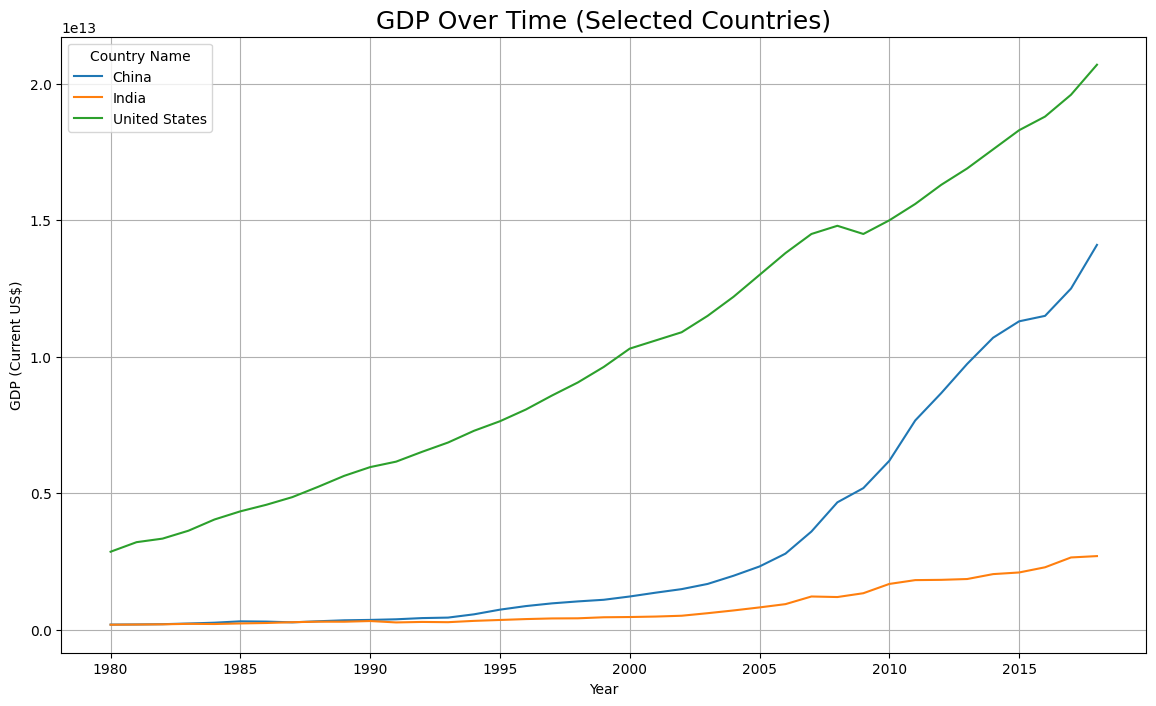

In [19]:
# Pick top countries (example: USA, China, India)
countries_to_plot = ["United States", "China", "India"]

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=gdp_long[gdp_long["Country Name"].isin(countries_to_plot)],
    x="Year", y="GDP", hue="Country Name"
)

plt.title("GDP Over Time (Selected Countries)", fontsize=18)
plt.xlabel("Year")
plt.ylabel("GDP (Current US$)")
plt.grid(True)
plt.show()


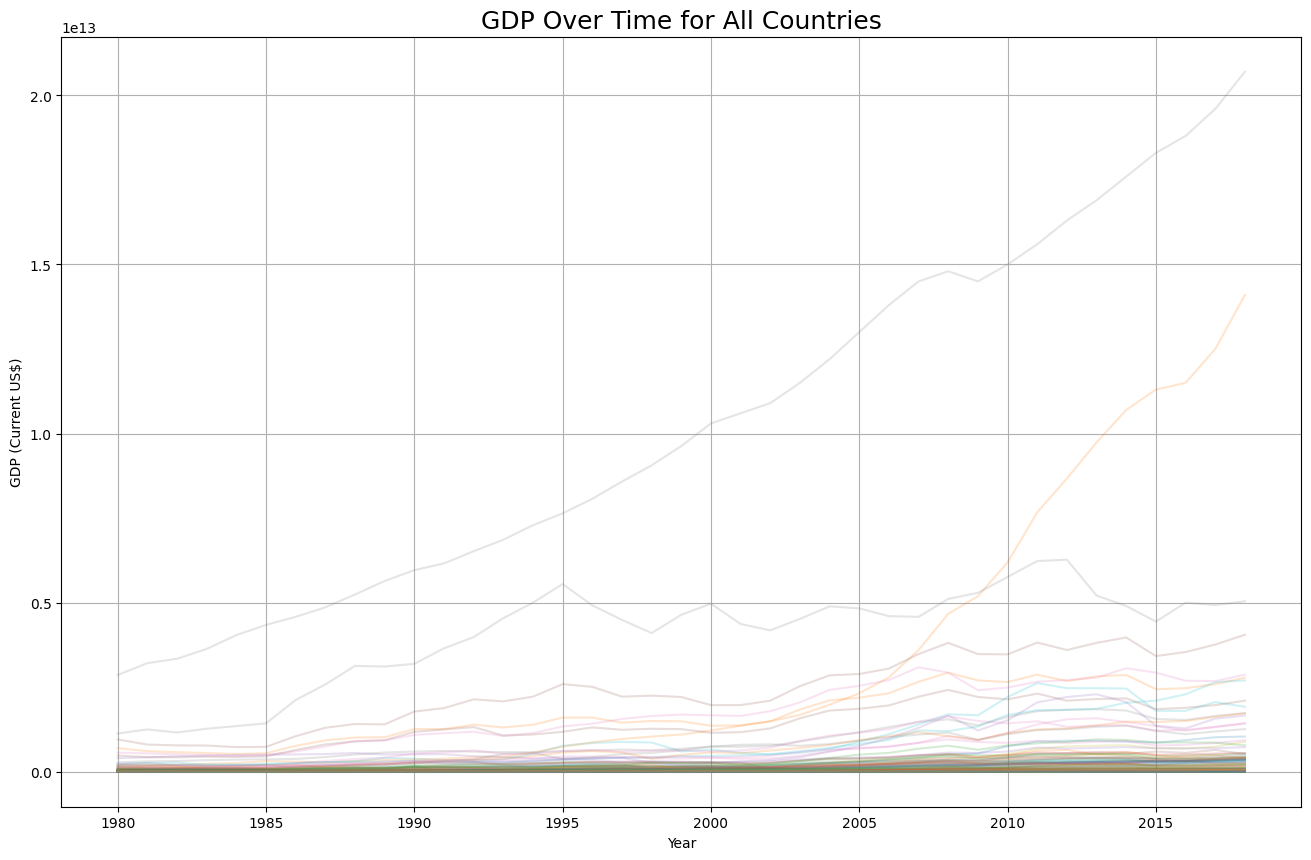

In [20]:
plt.figure(figsize=(16, 10))

for c in gdp_long["Country Name"].unique():
    plt.plot(
        gdp_long[gdp_long["Country Name"] == c]["Year"],
        gdp_long[gdp_long["Country Name"] == c]["GDP"],
        alpha=0.2
    )

plt.title("GDP Over Time for All Countries", fontsize=18)
plt.xlabel("Year")
plt.ylabel("GDP (Current US$)")
plt.grid(True)
plt.show()


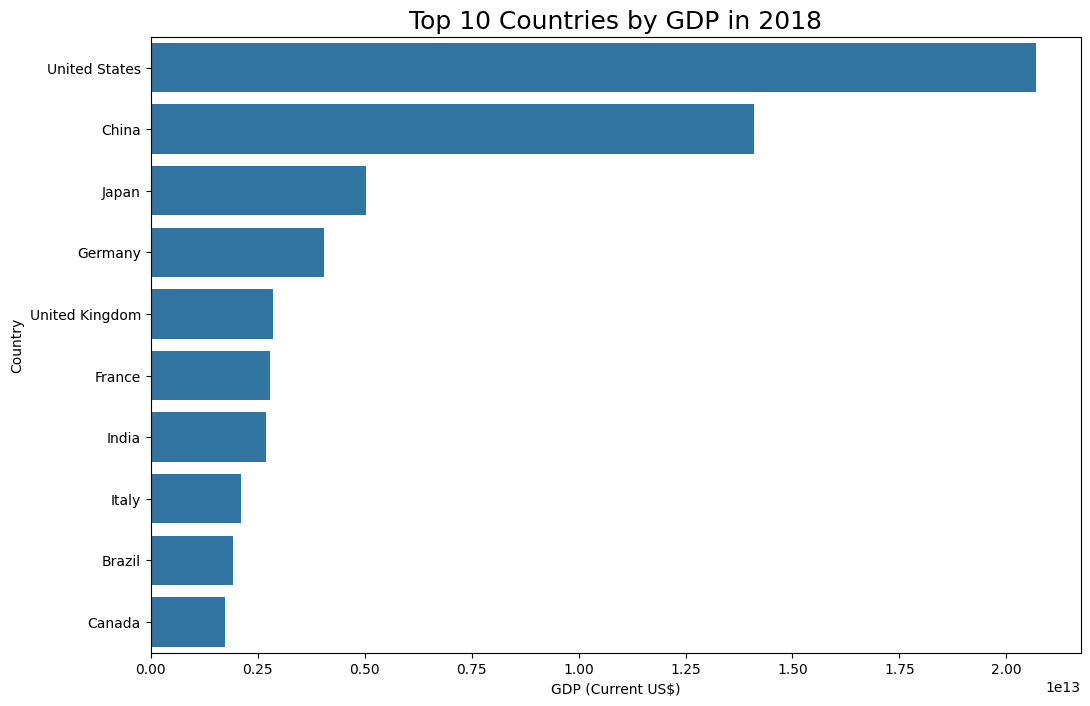

In [21]:
top_year = 2018

top_10 = (
    gdp_long[gdp_long["Year"] == top_year]
    .sort_values("GDP", ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_10, x="GDP", y="Country Name")
plt.title(f"Top 10 Countries by GDP in {top_year}", fontsize=18)
plt.xlabel("GDP (Current US$)")
plt.ylabel("Country")
plt.show()


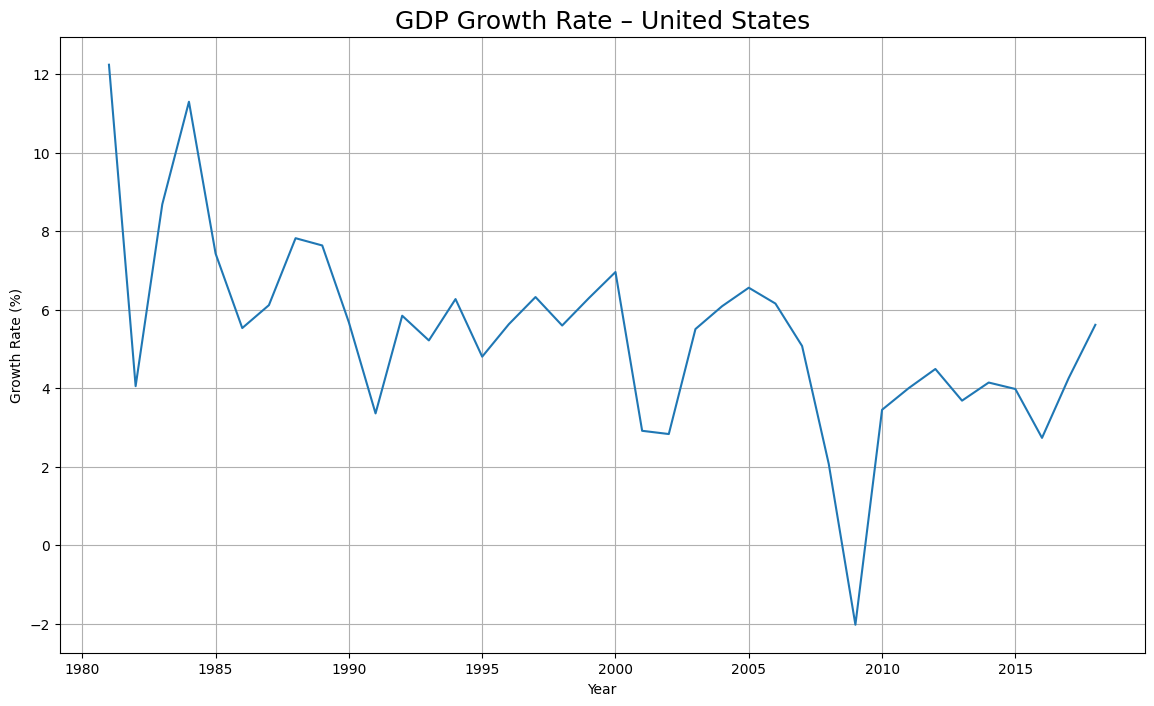

In [22]:
gdp_long_sorted = gdp_long.sort_values(["Country Name", "Year"])

gdp_long_sorted["GrowthRate"] = (
    gdp_long_sorted.groupby("Country Name")["GDP"].pct_change() * 100
)

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=gdp_long_sorted[gdp_long_sorted["Country Name"] == "United States"],
    x="Year", y="GrowthRate"
)
plt.title("GDP Growth Rate – United States", fontsize=18)
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.grid(True)
plt.show()
